# Klasifikasi Dataset Dry Bean Menggunakan Decision Tree Classifier

Petunjuk Penggunaan:
1. Pada Menu Bar Jupyter, tekan menu Run.
2. Tekan sub menu Run All Cells.

#### Mengimpor Library Awal

In [35]:
# Mengimpor library Numpy
import numpy as np
# Mengimpor Library Pandas
import pandas as pd

#### Memasukkan Dataset

In [36]:
# Membaca file dan disimpan di df (DataFrame)
df = pd.read_excel('Dry_Bean_Dataset.xlsx')
# Menampilkan df
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


#### Mengakses Data yang Diperlukan

In [37]:
# Mencetak isi kolom Class
df['Class']

,Class
0,SEKER
1,SEKER
2,SEKER
3,SEKER
4,SEKER
...,...
13606,DERMASON
13607,DERMASON
13608,DERMASON
13609,DERMASON


In [38]:
# Mencetak informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [39]:
# Mencetak nilai unik pada kolom Class
df.isnull().sum()

,0
Area,0
Perimeter,0
MajorAxisLength,0
MinorAxisLength,0
AspectRation,0
Eccentricity,0
ConvexArea,0
EquivDiameter,0
Extent,0
Solidity,0


In [40]:
# Mencetak kolom Class dataset secara unik
df['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [41]:
# Menampilkan jumlah setiap nilai pada kolom Class
df["Class"].value_counts()

,count
Class,
DERMASON,3546
SIRA,2636
SEKER,2027
HOROZ,1928
CALI,1630
BARBUNYA,1322
BOMBAY,522


#### Melakukan Data Pre-Processing

In [42]:
# Mengimpor library untuk data pre-processing
from sklearn.preprocessing import LabelEncoder
# Mengubah nilai dalam kolom 'Class' menjadi bilangan bulat
labelencoder = LabelEncoder()
df["Class"] = labelencoder.fit_transform(df['Class'])

In [43]:
# Pembagian feature (X) dan target (y)
X = df.iloc[:,0:16]
y = df.iloc[:,16:]

#### Splitting Dataset

In [44]:
# Mengimpor library untuk splitting dataset
from sklearn.model_selection import train_test_split
# Pembagian dataset menjadi data training sebesar 80% dan data testing sebesar 20%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

#### Melakukan Data Pre-Processing

In [45]:
# Mengimpor library untuk data pre-processing
from sklearn.preprocessing import StandardScaler
# Melakukan penskalaan standar pada data_train dan data_test
standardscaler = StandardScaler()
X_train = standardscaler.fit_transform(X_train)
X_test = standardscaler.transform(X_test)

#### Klasifikasi Decision Tree

In [46]:
# Mengimpor library Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Memasukkan objek klasifikasi Decision Tree
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')


 Accuracy score untuk set testing :
  0.8968049944913699


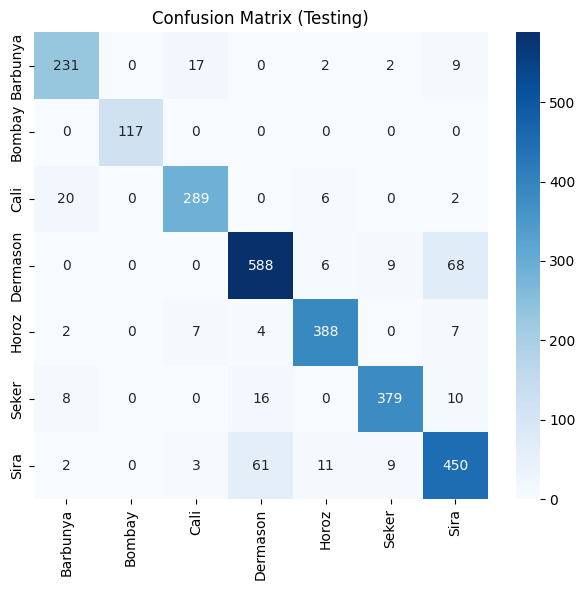


 Classification report untuk set testing :
               precision    recall  f1-score   support

    Barbunya       0.88      0.89      0.88       261
      Bombay       1.00      1.00      1.00       117
        Cali       0.91      0.91      0.91       317
    Dermason       0.88      0.88      0.88       671
       Horoz       0.94      0.95      0.95       408
       Seker       0.95      0.92      0.93       413
        Sira       0.82      0.84      0.83       536

    accuracy                           0.90      2723
   macro avg       0.91      0.91      0.91      2723
weighted avg       0.90      0.90      0.90      2723



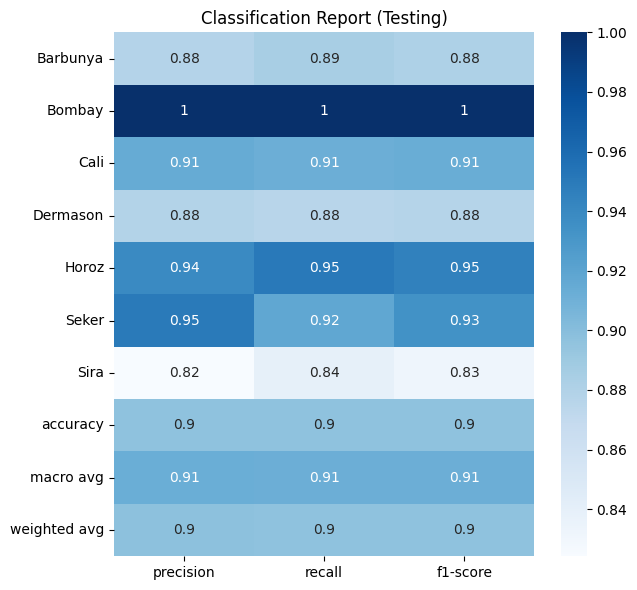

In [47]:
# Mengimpor beberapa library terkait evaluasi model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Mengimpor library Matplotlib
import matplotlib.pyplot as plt
# Mengimpor library Seaborn
import seaborn as sns
# Mencetak data testing
testing_predict = clf.predict(X_test)
# Mencetak accuracy score data testing
print ('\n Accuracy score untuk set testing :\n ', accuracy_score(y_test, testing_predict))

# Visualisasi confusion matrix
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, testing_predict), annot=True, fmt='d', cmap='Blues', xticklabels=['Barbunya', 'Bombay', 'Cali', 'Dermason', 'Horoz', 'Seker', 'Sira'], yticklabels=['Barbunya', 'Bombay', 'Cali', 'Dermason', 'Horoz', 'Seker', 'Sira'])
plt.title('Confusion Matrix (Testing)')

plt.tight_layout()
plt.show()

# Mencetak classification report data testing
print ('\n Classification report untuk set testing :\n',classification_report(y_test, testing_predict, target_names=['Barbunya', 'Bombay', 'Cali', 'Dermason', 'Horoz', 'Seker', 'Sira']))
# Visualisasi classification report
classification_report_testing = classification_report(y_test, testing_predict, target_names=['Barbunya', 'Bombay', 'Cali', 'Dermason', 'Horoz', 'Seker', 'Sira'], output_dict=True)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(pd.DataFrame(classification_report_testing).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report (Testing)')

plt.tight_layout()
plt.show()

In [48]:
# Mengimpor library Matplotlib
import matplotlib.pyplot as plt
# Mengimpor library Seaborn
import seaborn as sns
# Membuat feature importances
feature_importances = clf.feature_importances_
# Membuat DataFrame untuk memudahkan visualisasi
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
# Mengurutkan DataFrame berdasarkan feature importances
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# Mencetak feature importances
feature_importance_df

,Feature,Importance
2,MajorAxisLength,0.298397
12,ShapeFactor1,0.191028
3,MinorAxisLength,0.137706
11,Compactness,0.126974
1,Perimeter,0.076596
10,roundness,0.044853
14,ShapeFactor3,0.038685
15,ShapeFactor4,0.028201
9,Solidity,0.019543
8,Extent,0.011758
